<a href="https://colab.research.google.com/github/PayalSahrma/Course/blob/master/UOA_MSDS_(Arizona)_C5_Optimising_NNs_%7C%7C_26_Nov_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the price of used cars.



In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/GreatLearning/main/usedcars.csv")
df.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Gray,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2011,SE,17500,8367,White,AUTO


In [ ]:
df.isna().sum().sort_values(ascending=False)

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64

## Univariate Analysis

In [ ]:
print(df.price.mean())
print(df.price.median())

12961.933333333332
13591.5


In [ ]:
df.price.skew()
# https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241

-0.4249772912487074

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

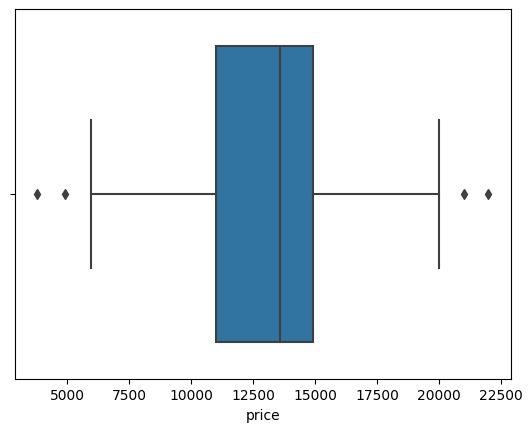

In [ ]:
sns.boxplot(data=df, x="price")
plt.show()

<ipython-input-9-fc317fe088ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


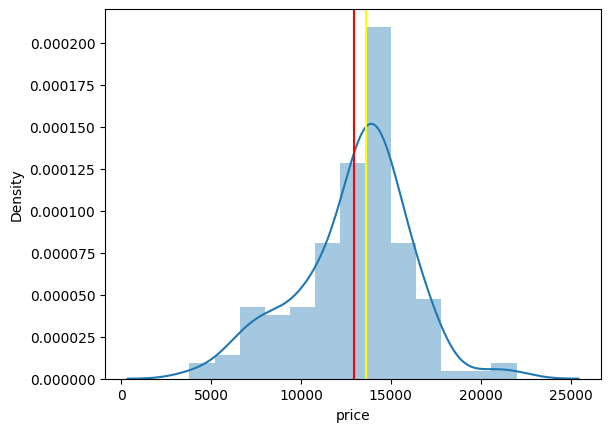

In [ ]:
sns.distplot(df.price)
plt.axvline(df.price.mean(), color="red")
plt.axvline(df.price.median(), color="yellow")
plt.show()

In [ ]:
df.shape

(150, 6)

In [ ]:
df.drop(df[df.price>20000].index, inplace=True, axis=0)

In [ ]:
df.shape

(148, 6)

In [ ]:
df.columns

Index(['year', 'model', 'price', 'mileage', 'color', 'transmission'], dtype='object')

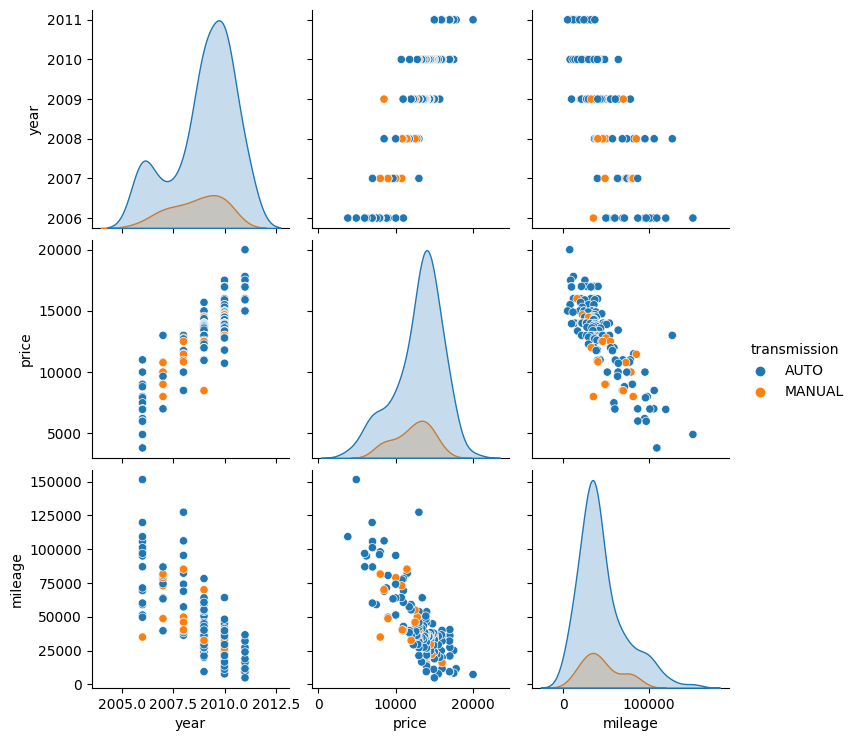

In [ ]:
sns.pairplot(df, hue="transmission")
plt.show()

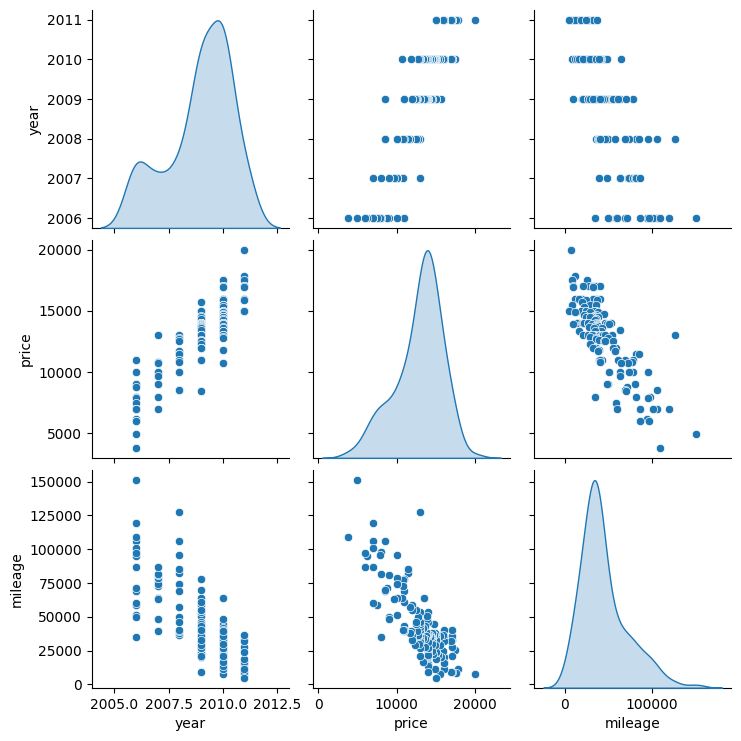

In [ ]:
sns.pairplot(df[["year","price","mileage"]], diag_kind="kde")
plt.show()

<ipython-input-16-79111df1693a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Spectral")


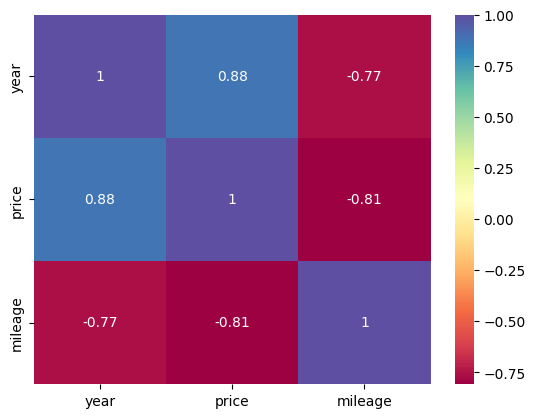

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Spectral")
plt.show()

In [ ]:
df.columns

Index(['year', 'model', 'price', 'mileage', 'color', 'transmission'], dtype='object')

In [ ]:
X = df.drop("price", axis=1)
Y = df['price']

In [ ]:
X.shape, Y.shape

((148, 5), (148,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103, 5), (45, 5), (103,), (45,))

In [ ]:
X_train.head(3)

,year,model,mileage,color,transmission
47,2010,SE,24855,Blue,AUTO
58,2009,SES,53733,Silver,AUTO
41,2010,SES,36469,Gray,AUTO


In [ ]:
X_train = pd.get_dummies(X_train, columns=["model", "color", "transmission", "year"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["model", "color", "transmission", "year"], drop_first=True)

In [ ]:
X_train.head(3)

,mileage,model_SEL,model_SES,color_Blue,color_Gray,color_Red,color_Silver,color_White,transmission_MANUAL,year_2007,year_2008,year_2009,year_2010,year_2011
47,24855,0,0,1,0,0,0,0,0,0,0,0,1,0
58,53733,0,1,0,0,0,1,0,0,0,0,1,0,0
41,36469,0,1,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[["mileage"]] = sc.fit_transform(X_train[["mileage"]])
X_test[["mileage"]] = sc.transform(X_test[["mileage"]])
X_train.head(3)

,mileage,model_SEL,model_SES,color_Blue,color_Gray,color_Red,color_Silver,color_White,transmission_MANUAL,year_2007,year_2008,year_2009,year_2010,year_2011
47,-0.732797,0,0,1,0,0,0,0,0,0,0,0,1,0
58,0.307819,0,1,0,0,0,1,0,0,0,0,1,0,0
41,-0.314288,0,1,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = target_scaler.transform(y_test.values.reshape(-1,1))

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1]

14

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

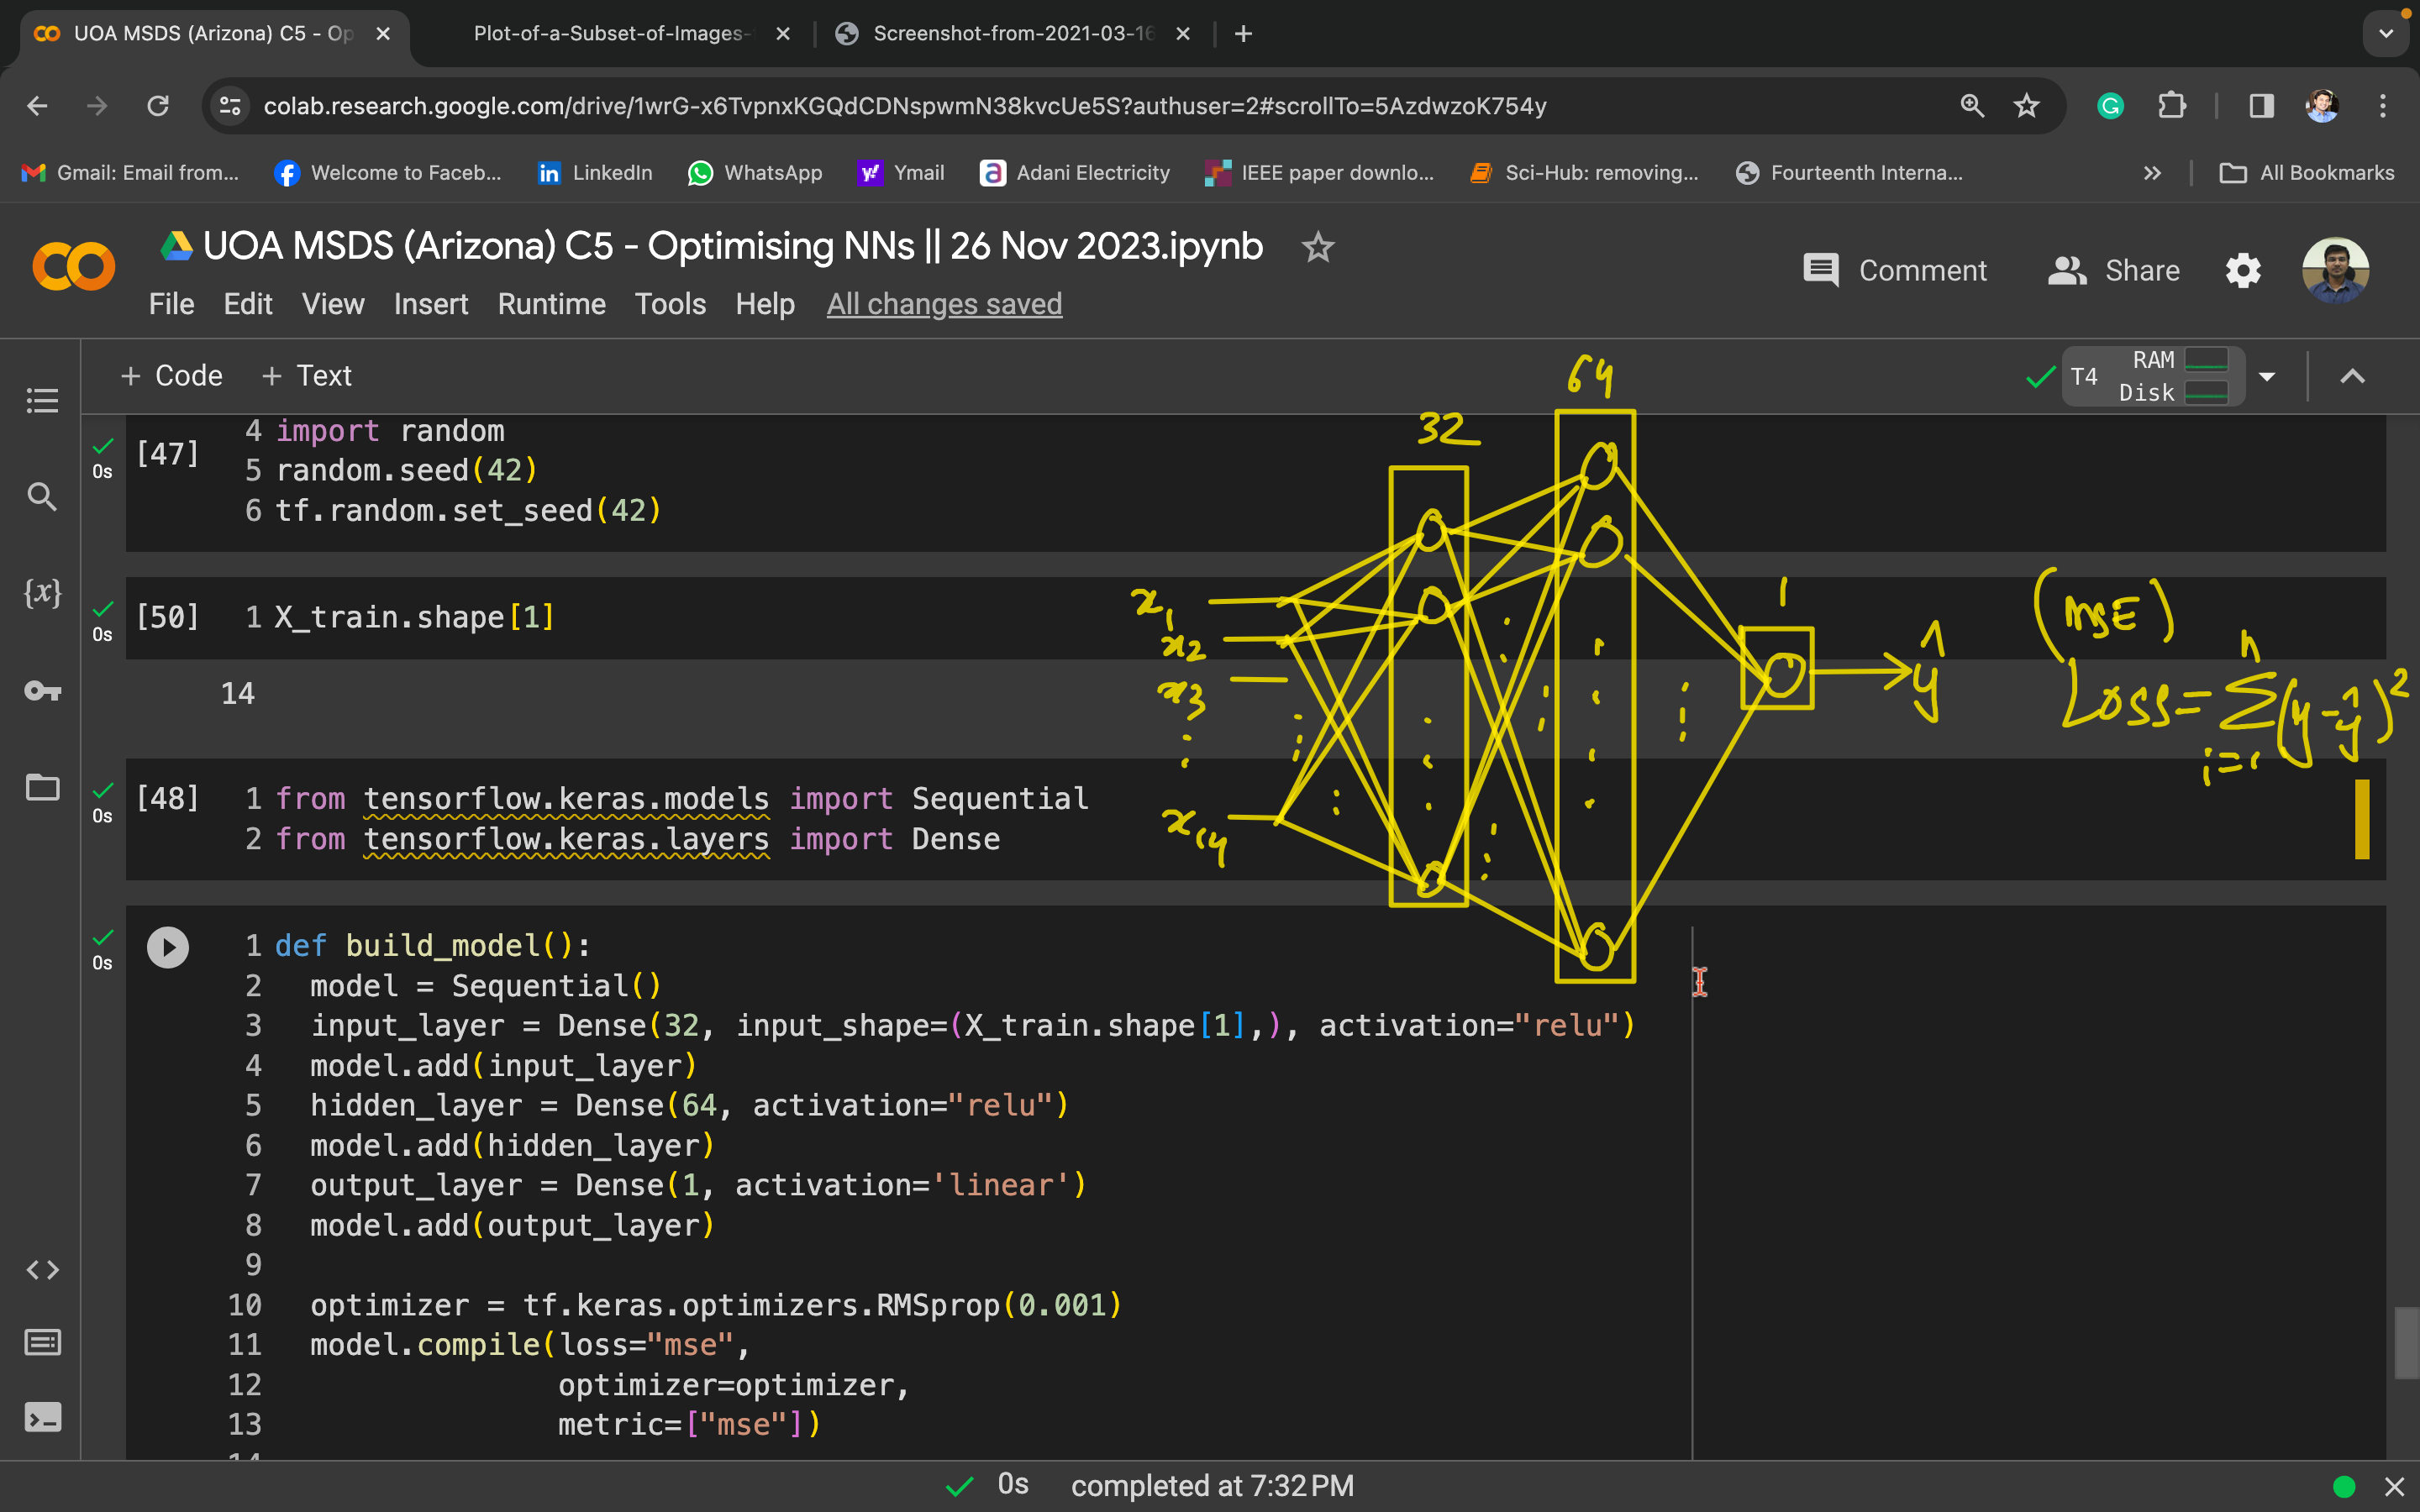

In [ ]:
def build_model():
  model = Sequential()
  input_layer = Dense(32, input_shape=(X_train.shape[1],), activation="relu")
  model.add(input_layer)
  hidden_layer = Dense(64, activation="relu")
  model.add(hidden_layer)
  output_layer = Dense(1, activation='linear')
  model.add(output_layer)

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mse"])

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
(14*32)+32, (32*64)+64, (64*1)+1

(480, 2112, 65)

In [ ]:
((14*32)+32) + ((32*64)+64) + ((64*1)+1)

2657

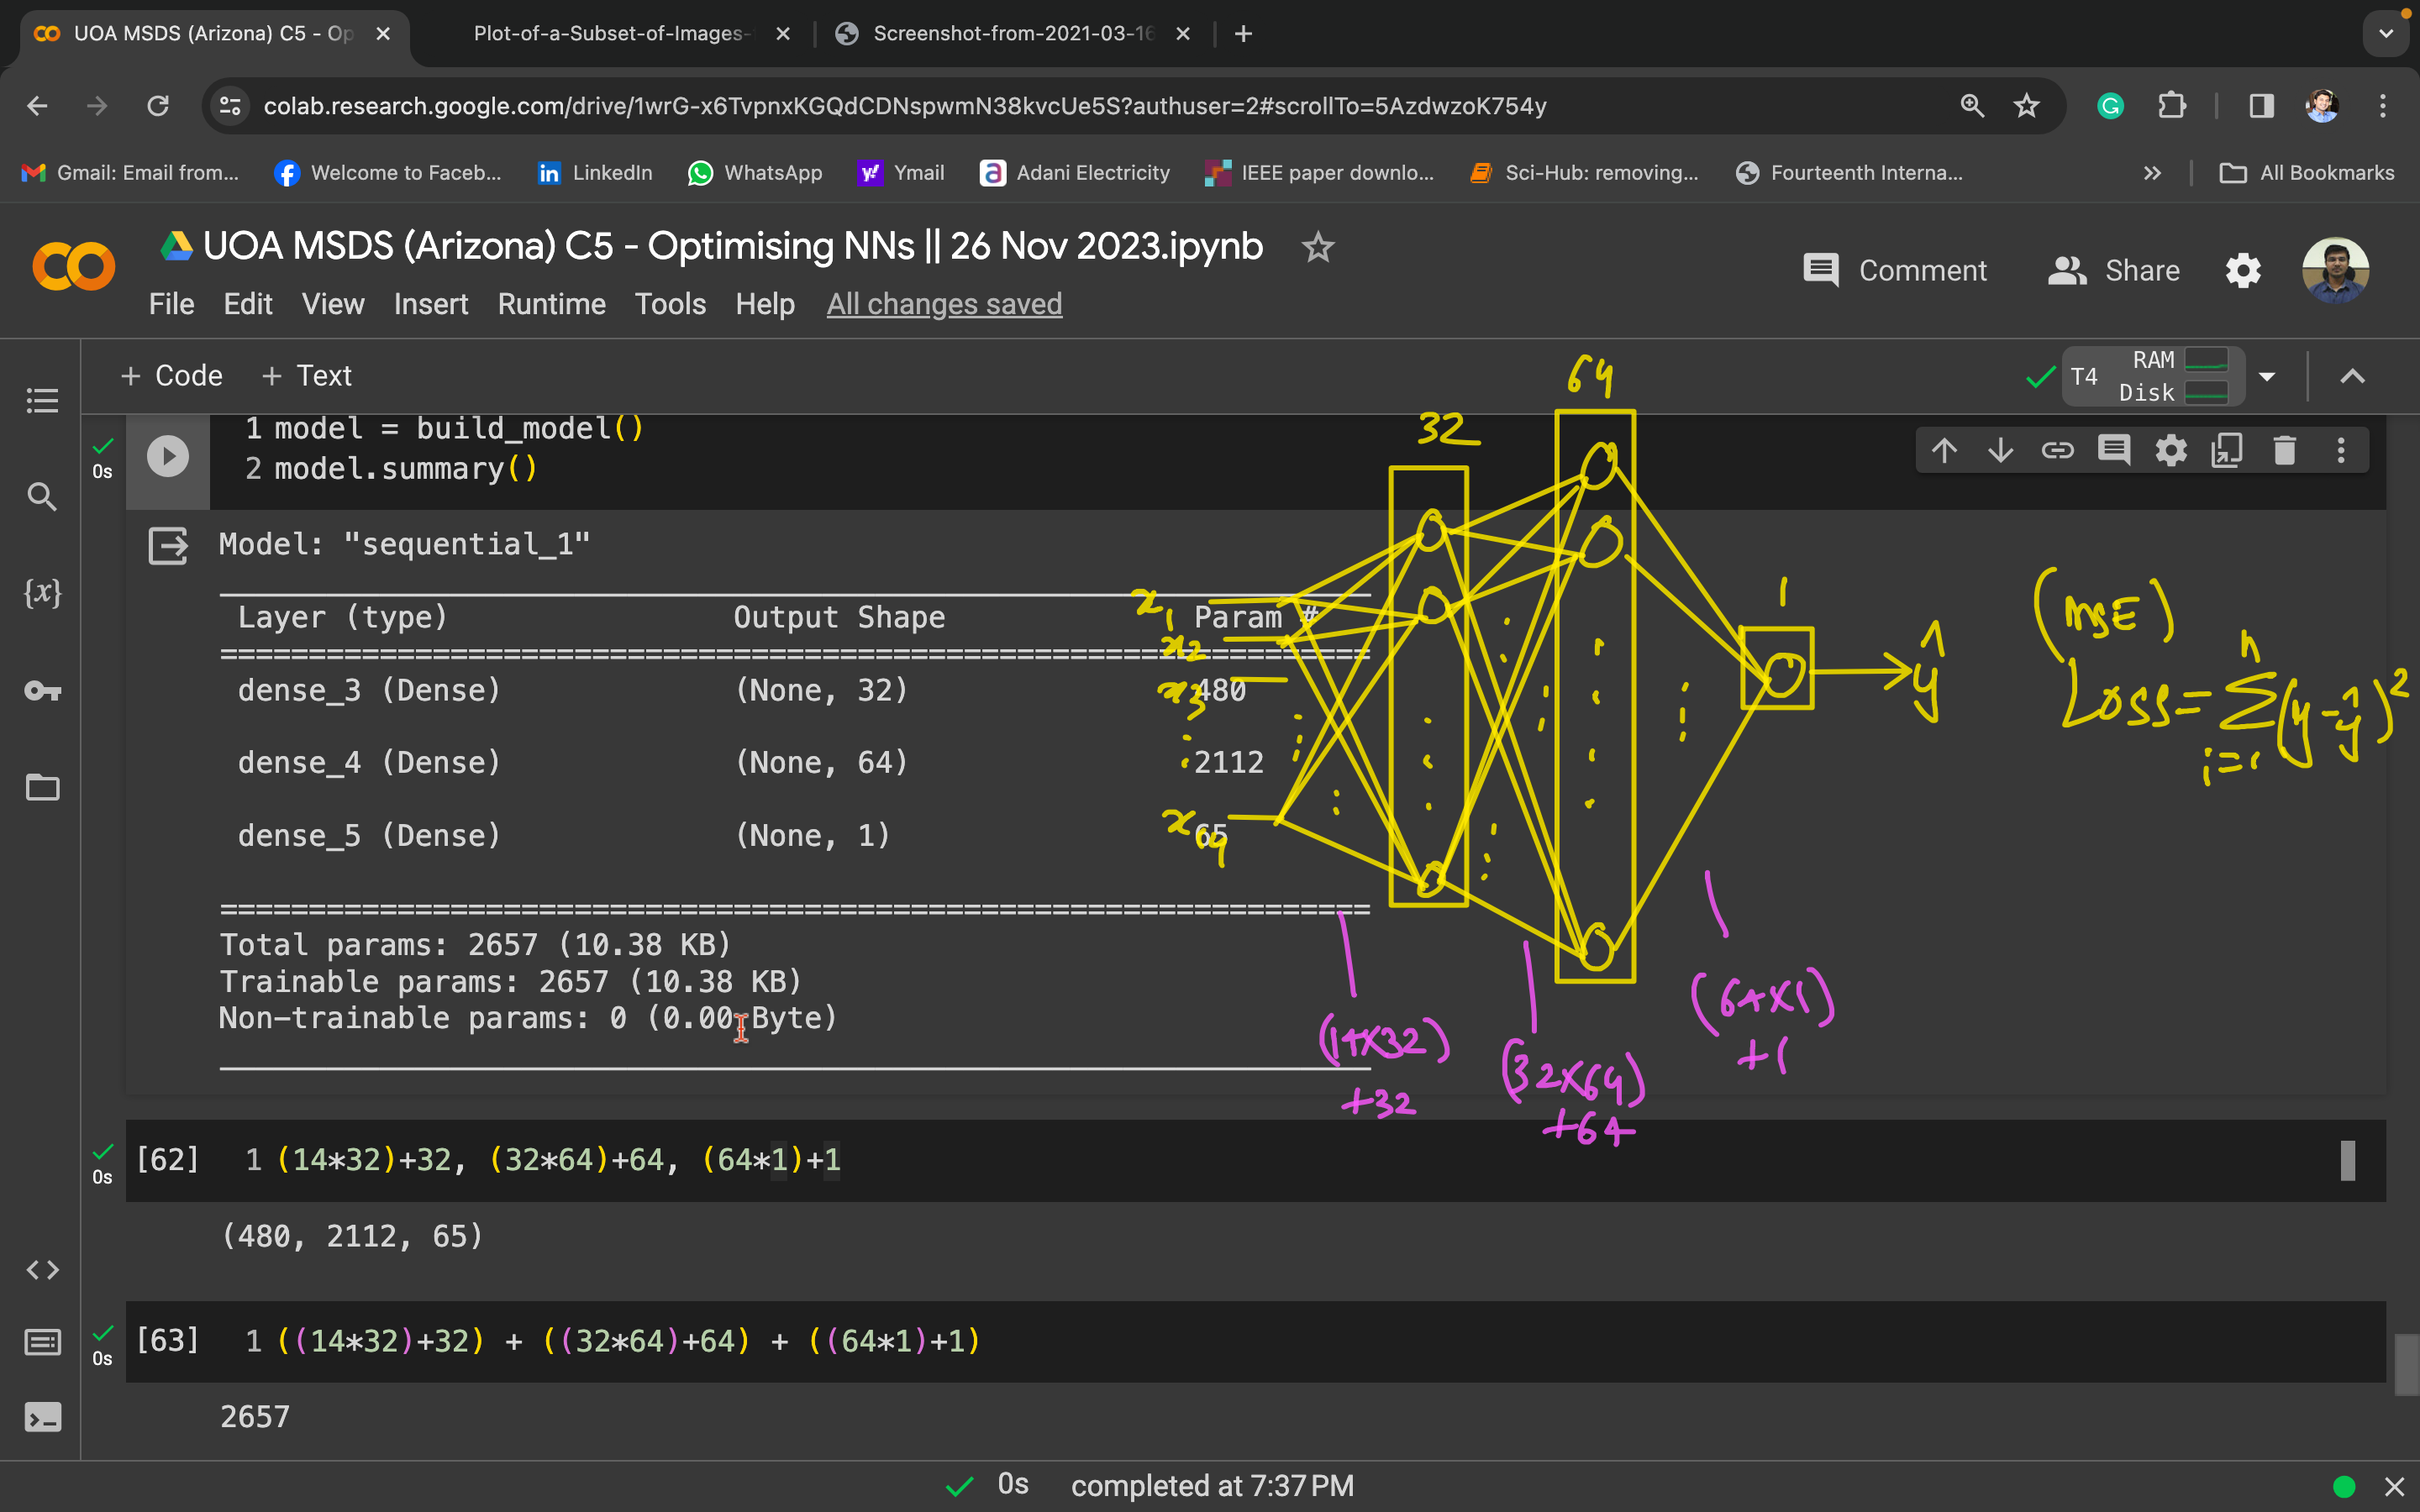

In [ ]:
EPOCHS = 50
history = model.fit(X_train, y_train, epochs= EPOCHS, validation_split= 0.2, verbose=1)

Epoch 1/50
3/3 [==============================] - 4s 91ms/step - loss: 0.9579 - mse: 0.9579 - val_loss: 0.7068 - val_mse: 0.7068
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.7670 - mse: 0.7670 - val_loss: 0.6404 - val_mse: 0.6404
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6497 - mse: 0.6497 - val_loss: 0.5925 - val_mse: 0.5925
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.5621 - mse: 0.5621 - val_loss: 0.5534 - val_mse: 0.5534
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.4874 - mse: 0.4874 - val_loss: 0.5198 - val_mse: 0.5198
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.4231 - mse: 0.4231 - val_loss: 0.4952 - val_mse: 0.4952
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3734 - mse: 0.3734 - val_loss: 0.4753 - val_mse: 0.4753
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3315 - mse: 0.3315 - val

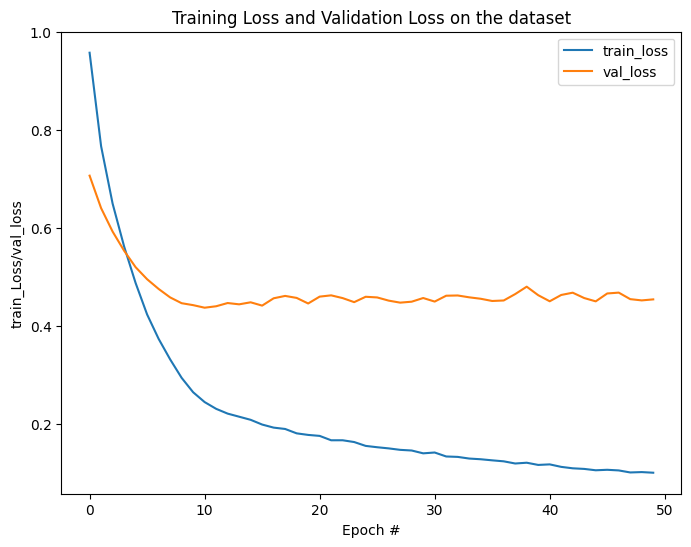

In [ ]:
N = 50
plt.figure(figsize=(8,6))
plt.plot(np.arange(0,N), history.history['loss'], label="train_loss")
plt.plot(np.arange(0,N), history.history['val_loss'], label="val_loss")

plt.title("Training Loss and Validation Loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="upper right")
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.1586 - mse: 0.1586


[0.15859419107437134, 0.15859419107437134]

In [ ]:
test_predictionsk = model.predict(X_test)
y_pred1 = target_scaler.inverse_transform(test_predictionsk.reshape(-1,1))

2/2 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(target_scaler.inverse_transform(y_test.reshape(-1,1)), y_pred1)

0.7233567632953842

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(64, activation="relu", input_shape=(14,)))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(8, activation="relu"))
model_2.add(Dense(1, activation="linear"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2657 (10.38 KB)
Trainable params: 2657 (10.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model_2.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mae"]
)

history = model_2.fit(X_train, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
3/3 [==============================] - 3s 240ms/step - loss: 1.0267 - mae: 0.7715 - val_loss: 0.8103 - val_mae: 0.6604
Epoch 2/50
3/3 [==============================] - 0s 87ms/step - loss: 0.9523 - mae: 0.7367 - val_loss: 0.7862 - val_mae: 0.6369
Epoch 3/50
3/3 [==============================] - 0s 67ms/step - loss: 0.8929 - mae: 0.7016 - val_loss: 0.7617 - val_mae: 0.6113
Epoch 4/50
3/3 [==============================] - 0s 52ms/step - loss: 0.8427 - mae: 0.6711 - val_loss: 0.7421 - val_mae: 0.5913
Epoch 5/50
3/3 [==============================] - 0s 66ms/step - loss: 0.7985 - mae: 0.6390 - val_loss: 0.7291 - val_mae: 0.5867
Epoch 6/50
3/3 [==============================] - 0s 76ms/step - loss: 0.7598 - mae: 0.6120 - val_loss: 0.7258 - val_mae: 0.5933
Epoch 7/50
3/3 [==============================] - 0s 76ms/step - loss: 0.7338 - mae: 0.5948 - val_loss: 0.7293 - val_mae: 0.6047
Epoch 8/50
3/3 [==============================] - 0s 115ms/step - loss: 0.7127 - mae: 0.5779 - v

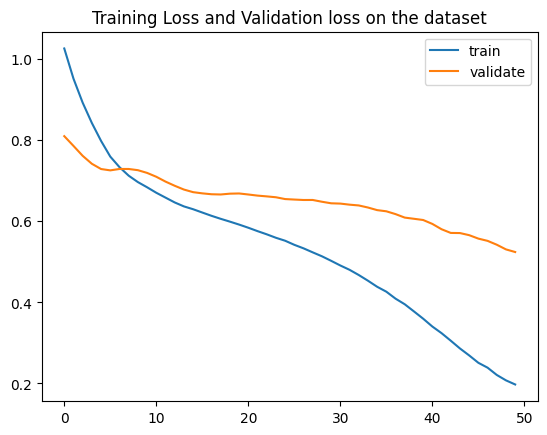

In [ ]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validate")
plt.title("Training Loss and Validation loss on the dataset")
plt.legend()
plt.show()

In [ ]:
model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 23ms/step - loss: 0.1522 - mae: 0.3158


[0.1522260308265686, 0.3157709240913391]

In [ ]:
test_predictions2 = model_2.predict(X_test)
y_pred_2 = target_scaler.inverse_transform(test_predictions2.reshape(-1,1))

2/2 [==============================] - 0s 26ms/step


In [ ]:
r2_score(target_scaler.inverse_transform(y_test.reshape(-1,1)), y_pred_2)

0.7344650225519258

In [ ]:
# https://keras.io/api/callbacks/early_stopping/
from keras.callbacks import EarlyStopping

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model_2.compile(loss="mse",
                optimizer=optimizer,
                metrics=["mae"]
)

history = model_2.fit(X_train, y_train, validation_split=0.2, epochs=250,
                      callbacks=[EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=5, start_from_epoch=70)])

Epoch 1/250
3/3 [==============================] - 1s 92ms/step - loss: 0.0073 - mae: 0.0414 - val_loss: 0.4442 - val_mae: 0.5598
Epoch 2/250
3/3 [==============================] - 0s 18ms/step - loss: 0.0073 - mae: 0.0397 - val_loss: 0.4448 - val_mae: 0.5603
Epoch 3/250
3/3 [==============================] - 0s 16ms/step - loss: 0.0073 - mae: 0.0405 - val_loss: 0.4441 - val_mae: 0.5596
Epoch 4/250
3/3 [==============================] - 0s 16ms/step - loss: 0.0072 - mae: 0.0397 - val_loss: 0.4447 - val_mae: 0.5601
Epoch 5/250
3/3 [==============================] - 0s 16ms/step - loss: 0.0073 - mae: 0.0399 - val_loss: 0.4451 - val_mae: 0.5605
Epoch 6/250
3/3 [==============================] - 0s 19ms/step - loss: 0.0072 - mae: 0.0397 - val_loss: 0.4461 - val_mae: 0.5613
Epoch 7/250
3/3 [==============================] - 0s 17ms/step - loss: 0.0072 - mae: 0.0406 - val_loss: 0.4443 - val_mae: 0.5598
Epoch 8/250
3/3 [==============================] - 0s 19ms/step - loss: 0.0072 - mae: 0.03

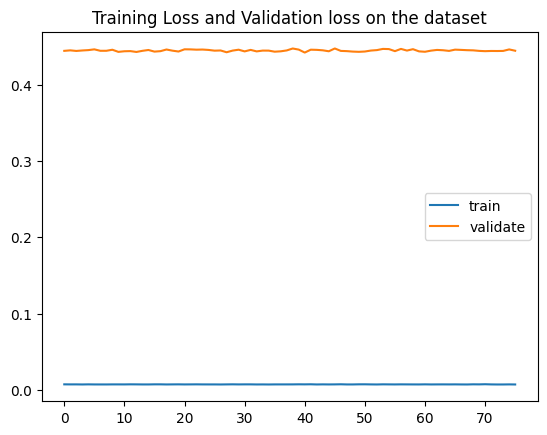

In [ ]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="validate")
plt.title("Training Loss and Validation loss on the dataset")
plt.legend()
plt.show()

In [ ]:
model_2.evaluate(X_test, y_test)
test_predictions2 = model_2.predict(X_test)
y_pred_2 = target_scaler.inverse_transform(test_predictions2.reshape(-1,1))
r2_score(target_scaler.inverse_transform(y_test.reshape(-1,1)), y_pred_2)

2/2 [==============================] - 0s 5ms/step


0.6521077215791478

## Additional Case Study:

https://www.kaggle.com/code/imsparsh/gtzan-genre-classification-deep-learning-val-92-4

# Happy Learning